# Hydration Number Analysis
1. N (NH4)
2. Na
3. Cl

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

def plot_settings():
    pos = data[:, 2]
    num_bins = 90

    bin_means, bin_edges, binnumber = binned_statistic(pos, hnum, statistic='mean', bins=num_bins, range=(min(pos), max(pos)))
    bin_counts, _, _ = binned_statistic(pos, hnum, statistic='count', bins=num_bins, range=(min(pos), max(pos)))
    bin_std, _, _ = binned_statistic(pos, hnum, statistic='std', bins=num_bins, range=(min(pos), max(pos)))
    
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    plt.figure(figsize=(20, 6))
    plt.errorbar(bin_centers, bin_means, yerr=bin_std, fmt='s', ls="-",capsize=5)
    plt.title("Hydration Number")
    plt.xlabel("Channel Axis (Å)")
    plt.ylabel("Coordination Number")
    plt.grid(True)

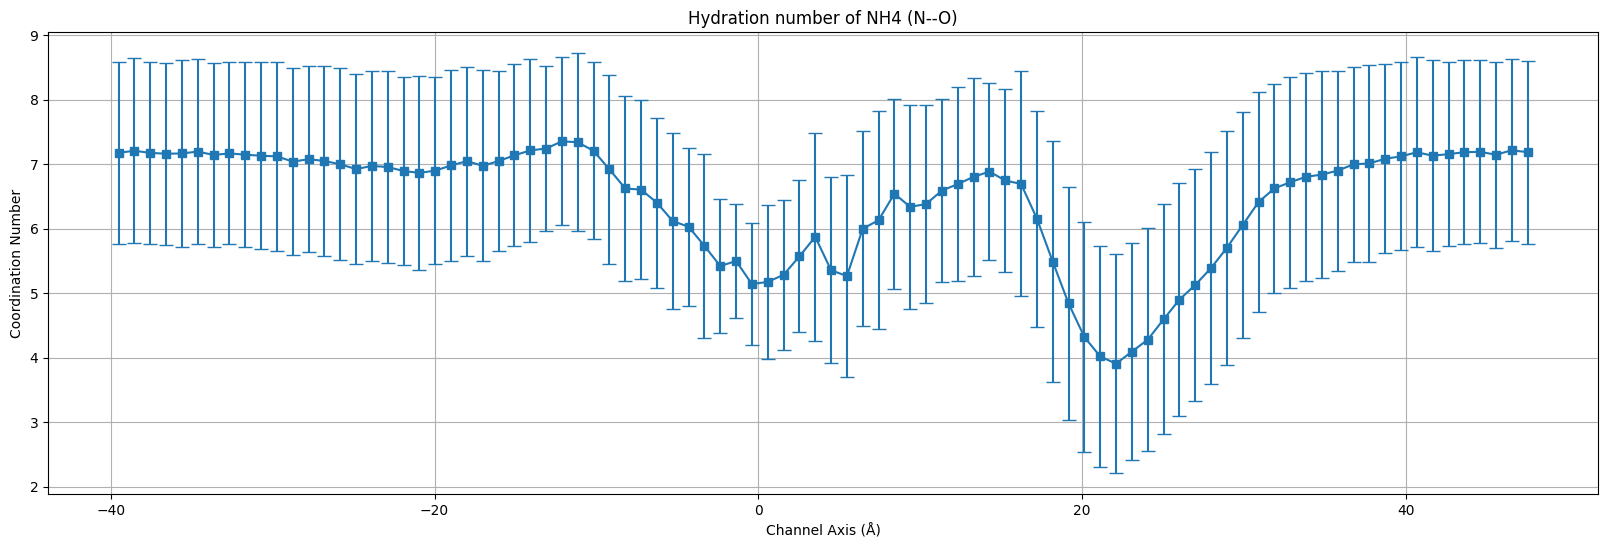

In [12]:
data = np.loadtxt('hydration-number/nh4cl-hnum/nh4-in-pore.dat')
hnum = data[:, 3]
plot_settings()
plt.title("Hydration number of NH4 (N--O)")
plt.show()

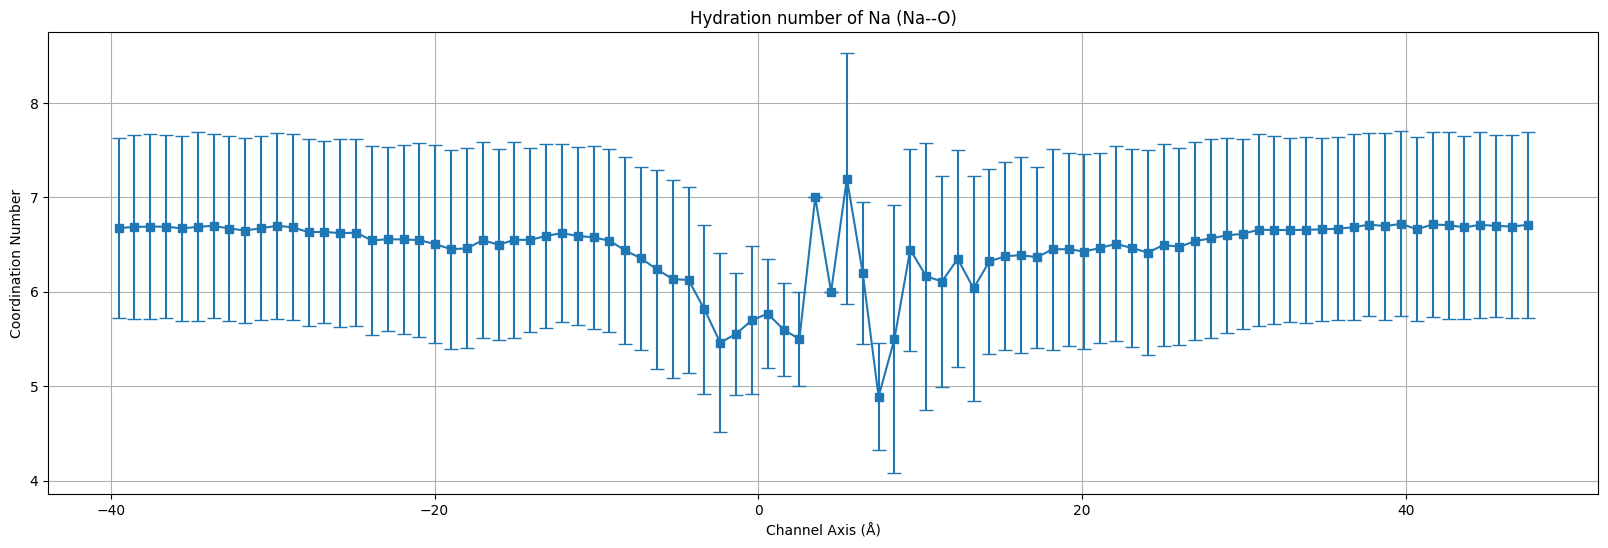

In [16]:
data = np.loadtxt('hydration-number/nacl-hnum/na-in-pore.dat')
hnum = data[:, 3] #wto

plot_settings()
plt.title("Hydration number of Na (Na--O)")
plt.show()

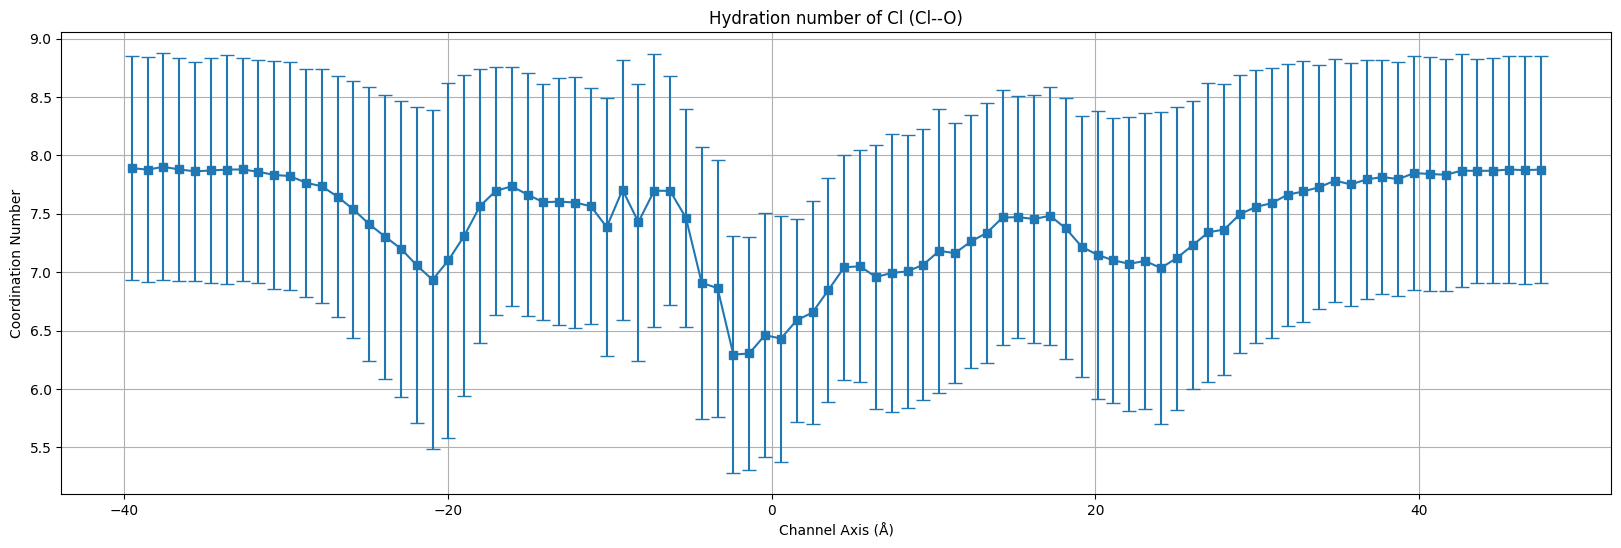

In [14]:
data = np.loadtxt('hydration-number/nacl-hnum/cl-in-pore.dat')
hnum = data[:, 3] #wto

plot_settings()
plt.title("Hydration number of Cl (Cl--O)")
plt.show()

In [8]:
!cat hydration-number/nh4cl-hnum/nh4_in_pore.tcl


proc mycoordnum {frame} {
    global out out2  all pro popc  squareR cutoff_O cutoff_H
    
    ## center system such that bilayer center is at z=0
    set popc_cen [measure center $popc]
    set popc_z [lindex $popc_cen 2]
    $all moveby [list 0 0 -$popc_z]
    puts -nonewline "frame $frame: popc centered at [lindex [measure center $popc] 2] "

    set pro_cen [measure center $pro]
    set pro_cen_x [lindex $pro_cen 0]
    set pro_cen_y [lindex $pro_cen 1]

    set ion_index [[atomselect top "name NZ and (x-$pro_cen_x)*(x-$pro_cen_x)+(y-$pro_cen_y)*(y-$pro_cen_y) < $squareR and z > -40 and z < 48"] get index]; # all ions in channel
    puts -nonewline "\t [llength $ion_index] ions in channel. "


    foreach ionID $ion_index {
	      set ion [atomselect top "index $ionID"]
         set ion_cen [measure center $ion]

         set wto [atomselect top "water and name OH2 and within $cutoff_O of index $ionID"];
         set wth [atomselect top "water and name H1 H2 and within $cutoff_H 

In [9]:
!cat hydration-number/nacl-hnum/cl_in_pore.tcl


proc mycoordnum {frame} {
    global out out2  all pro popc  squareR cutoff_O cutoff_H
    
    ## center system such that bilayer center is at z=0
    set popc_cen [measure center $popc]
    set popc_z [lindex $popc_cen 2]
    $all moveby [list 0 0 -$popc_z]
    puts -nonewline "frame $frame: popc centered at [lindex [measure center $popc] 2] "

    set pro_cen [measure center $pro]
    set pro_cen_x [lindex $pro_cen 0]
    set pro_cen_y [lindex $pro_cen 1]

    set ion_index [[atomselect top "name CLA and (x-$pro_cen_x)*(x-$pro_cen_x)+(y-$pro_cen_y)*(y-$pro_cen_y) < $squareR and z > -40 and z < 48"] get index]; # all ions in channel
    puts -nonewline "\t [llength $ion_index] ions in channel. "


    foreach ionID $ion_index {
	      set ion [atomselect top "index $ionID"]
         set ion_cen [measure center $ion]

         set wto [atomselect top "water and name OH2 and within $cutoff_O of index $ionID"];
         set wth [atomselect top "water and name H1 H2 and within $cutoff_H